Link to Github repo: http://localhost:8888/tree/Astron_121/Radio-Astronomy-Lab-Work

In [1]:
# Importing useful packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Main Lab Objectives: 
    1. Demonstrate an undersdtanding of Nyquist sampling and aliasing. 
    2. Characterize the bandpass filter of the SDR.
    3. Use and accurately describe power and voltage spectra.
    4. Investigate spectral leakage and frequncy resolution.
    5. Analyze the properties of noise and the radiometer equation.  
    6. Demonstrate the operation of DSB and SSB mixers and explain their importance.  
    7. Accurately present quantitative results in the context of expectations, theory, tests, and diagnostics that  
    demonstrate the correctnesss of the analysis.  
    8. Build an installable Python package, with revision control and unit tests, that supports your report.  
    Provide the link in your report. 

### Working question:  <br> 
##### How can aliasing be utilized to filter noise and pass through a clean signal where we can understand the information being conveyed?

Main idea from this is take in a noisy signal, alias it down, and then see how less data might give us a clearer signal when noise is added.

Centering all plots for formality. Source linked below. 

### Experimental Set-up and Theoretical Background 

perhaps separate these two once you start writing

In [2]:
# Source - https://stackoverflow.com/a/66493988
# Posted by Jay Patel
# Retrieved 2026-02-05, License - CC BY-SA 4.0

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


In [3]:
# Checking quality of data initially using my quickplot function in my package

import ziptoplot # custom package 
from ziptoplot import unzip #unzip opens numpy arrays data from .npz files and returns specififed index of data
from ziptoplot import plot #plot has a quick plot function to quickly check if data looks like expected output

# plot.quickplot(ziptoplot.unzip.unzip('ny_lim_600khz.npz', 5) , 600, 100, 100, "600 kHz Signal At Nyquist Limit", 'coral')

<figure>
  <figcaption>Fig. 1 Plot above shows a quick plot of a signal at 600kHz with an input amipltude at 100mV from the generator, which displays at +/- 5 ADC after being digitized. Note the spikey look to the wave. This is because the sample rate is at the boundary of a nyquist zone, meaning data was sampled at a minimum of twice between the crest and troph. Thus, there are not enough data points for the plot to round out. While this does not look particularly sinusoidal, there is sufficient information to observe what frequency was collected. </figcaption>
</figure>

In order to answer our working question, we recorded three different frequencies with sampling rates below, at, and above their respective Nyquist limits. For this lab, we decided to investigate the behavior of these frequences with the specifices sampling rates around the Niquist Limit found at $f_{signal} \geq 2f_{sample rate}$

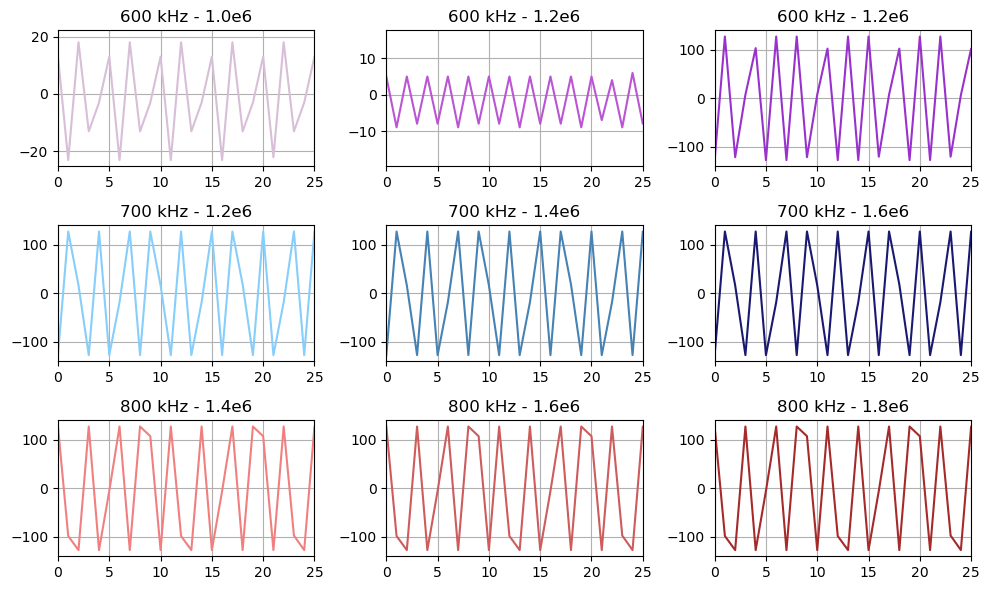

In [4]:
# Checking quality of data initially using my quickplot function in my package

import ziptoplot # custom package 
from ziptoplot import unzip #unzip opens numpy arrays data from .npz files and returns specififed index of data
from ziptoplot import plot #plot has a quick plot function to quickly check if data looks like expected output

# 600 kHz data, amplitude = 100 mV

#sample rate = 1.0e6
belowlim_600 = ziptoplot.unzip.unzip("below_lim_600khz.npz", 5)
# Check data:
# plot.quickplot(belowlim_600 , 600, 100, 100, "600 kHz Signal Below Nyquist Limit", 'darkorchid')
# Data looks good. Same process repeated for the following frequences at differing sample rates. 

#sample rate = 1.2e6
atlim_600 = ziptoplot.unzip.unzip("ny_lim_600khz.npz", 5)
# plot.quickplot(atlim_600 , 600, 100, 100, "600 kHz Signal At Nyquist Limit", 'darkorchid')
# Looks good

#sample rate = 1.4e6
abovelim_600 = ziptoplot.unzip.unzip("above_lim_600khz.npz", 5)
# plot.quickplot(abovelim_600 , 600, 100, 100, "600 kHz Signal Above Nyquist Limit", 'darkorchid')
# Looks good, note it is hitting upper and lower limtis for ADC. Not ideal. 



# 700 kHz data, amplitude = 100 mV

#sample rate = 1.0e6
belowlim_700 = ziptoplot.unzip.unzip("below_lim_700khz.npz", 5)
# plot.quickplot(belowlim_700, 700, 100, 100, "700 kHz Signal Below Nyquist Limit", 'peru')
# Looks good

#sample rate = 1.2e6
atlim_700 = ziptoplot.unzip.unzip("ny_lim_700khz.npz", 5)
# plot.quickplot(atlim_700, 700, 100, 100, "700 kHz Signal At Nyquist Limit", 'peru')
# Looks good

#sample rate = 1.4e6
abovelim_700 = ziptoplot.unzip.unzip("above_lim_700khz.npz", 5)
# plot.quickplot(abovelim_700, 700, 100, 100, "700 kHz Signal Above Nyquist Limit", 'peru')
# Looks good



# 800 kHz data, amplitude = 100 mV

#sample rate = 1.0e6
belowlim_800 = ziptoplot.unzip.unzip("below_lim_800khz.npz", 5)
# plot.quickplot(belowlim_800, 800, 100, 100, "800 kHz Signal Below Nyquist Limit", 'skyblue')
# Looks good

#sample rate = 1.2e6
atlim_800 = ziptoplot.unzip.unzip("above_lim_800khz.npz", 5)
# plot.quickplot(atlim_800, 800, 100, 100, "800 kHz Signal At Nyquist Limit", 'peru')
# Looks good


#sample rate = 1.4e6
abovelim_800 = ziptoplot.unzip.unzip("above_lim_800khz.npz", 5)
# plot.quickplot(abovelim_800, 800, 100, 100, "800 kHz Signal Above Nyquist Limit", 'peru')
# Looks good



# Subplot grid to compare frequencess and sampling rates.
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(10, 6))

# row 1: 600 kHz plots
axes[0, 0].plot(belowlim_600, color='thistle')
axes[0, 0].set_title("600 kHz - 1.0e6")
axes[0, 0].set_xlim(0, 25)
axes[0, 0].grid(True)

axes[0, 1].plot(atlim_600, color='mediumorchid')
axes[0, 1].set_title("600 kHz - 1.2e6")
axes[0, 1].set_xlim(0, 25)
axes[0, 1].grid(True)

axes[0, 2].plot(abovelim_600, color='darkorchid')
axes[0, 2].set_title("600 kHz - 1.2e6")
axes[0, 2].set_xlim(0, 25)
axes[0, 2].grid(True)

# row 2: 700 kHz plots
axes[1, 0].plot(abovelim_700, color='lightskyblue')
axes[1, 0].set_title("700 kHz - 1.2e6")
axes[1, 0].set_xlim(0, 25)
axes[1, 0].grid(True)

axes[1, 1].plot(abovelim_700, color='steelblue')
axes[1, 1].set_title("700 kHz - 1.4e6")
axes[1, 1].set_xlim(0, 25)
axes[1, 1].grid(True)

axes[1, 2].plot(abovelim_700, color='midnightblue')
axes[1, 2].set_title("700 kHz - 1.6e6")
axes[1, 2].set_xlim(0, 25)
axes[1, 2].grid(True)

# row 2: 800 kHz plots
axes[2, 0].plot(abovelim_800, color='lightcoral')
axes[2, 0].set_title("800 kHz - 1.4e6")
axes[2, 0].set_xlim(0, 25)
axes[2, 0].grid(True)

axes[2, 1].plot(abovelim_800, color='indianred')
axes[2, 1].set_title("800 kHz - 1.6e6")
axes[2, 1].set_xlim(0, 25)
axes[2, 1].grid(True)

axes[2, 2].plot(abovelim_800, color='brown')
axes[2, 2].set_title("800 kHz - 1.8e6")
axes[2, 2].set_xlim(0, 25)
axes[2, 2].grid(True)



plt.tight_layout()
plt.show() 

Only comparing 600 kHz to the expected sin waves because it looks the most accurate from the above plots. Check that you are using the correct data. While the ampliudes differ, that is one of the only ones that is not being cut off, which is why I trust it more. 

In [5]:
# Calculate expected aliased frequency
from ziptoplot import caf

sampling_rate = 1000000 # Hz
frequency = 600000 # Hz
k = 1 # first nyquist zone

print(ziptoplot.caf.calcaf(600000, 1000000, 1))
# f_alias =  (sampling_rate - k * frequency)


Expected Aliased Frequency: 400000


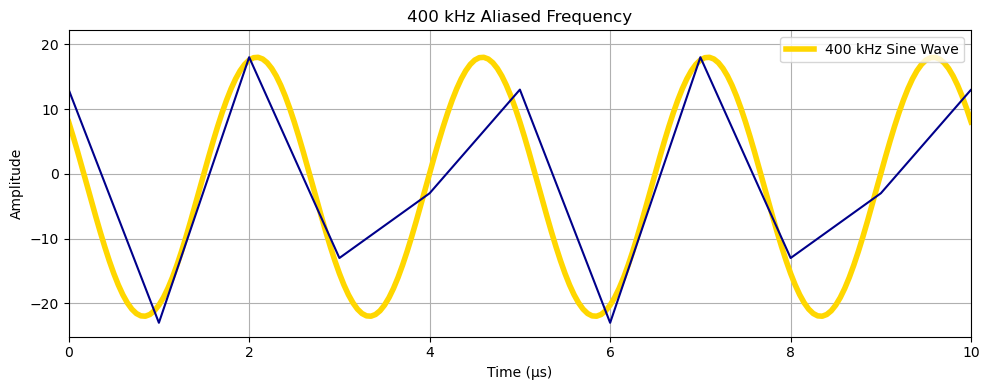

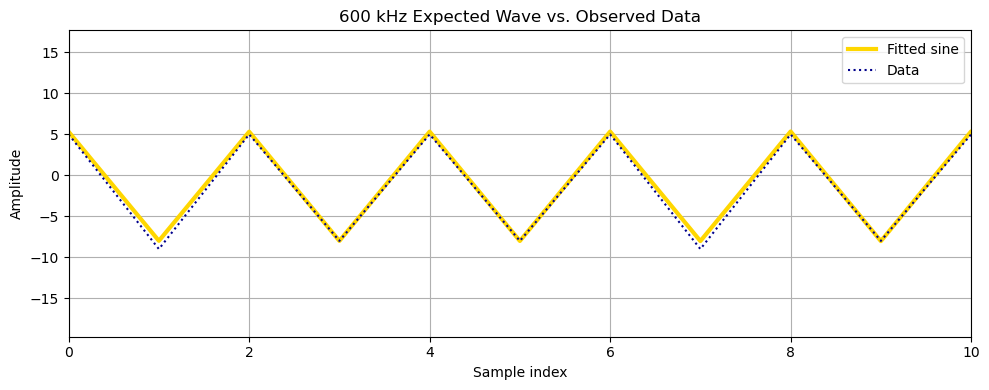

In [6]:
# Initial estimate of sin wave, between calculating the expected aliased frequency and testing sin waves. 

import numpy as np
import matplotlib.pyplot as plt


# Clean but aliased 600 kHz
# Parameters
frequency = 400e3       # expected based off calculations above
amplitude = 20          # ±20
sampling_rate = 20e6    # 20 MHz sampling rate for smooth plot
duration = 10e-6         # 10 microseconds (enough to see a few cycles)

# Time vector
t = np.arange(0, duration, 1/sampling_rate)

# Sine wave generation
y = amplitude * np.sin(2 * np.pi * frequency * t + (5*np.pi)/6) - 2


# Plot
plt.figure(figsize=(10, 4))
plt.plot(t * 1e6, y, 'gold', linewidth = 4, label=f'{frequency/1e3:.0f} kHz Sine Wave')
plt.plot(belowlim_600, 'darkblue')
plt.xlim(0,10)

plt.title('400 kHz Aliased Frequency')
plt.xlabel('Time (µs)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()





# 600 kHz Data
y = atlim_600

# Sample index (uniform sampling)
N = len(y)
n = np.arange(N)

# Sine model (cycles per sample)
def sine_model(n, A, f, phi, C):
    return A * np.sin(2 * np.pi * f * n + phi) + C

# Initial guesses
A_guess = (np.max(y) - np.min(y)) / 2
C_guess = np.mean(y)
f_guess = 0.5      # strong alternating pattern
phi_guess = 0.0

p0 = [A_guess, f_guess, phi_guess, C_guess]

# Curve fitting
params, _ = curve_fit(
    sine_model,
    n,
    y,
    p0=p0,
    maxfev=20000
)

A_fit, f_fit, phi_fit, C_fit = params


# Plot
y_fit = sine_model(n, A_fit, f_fit, phi_fit, C_fit)

plt.figure(figsize=(10, 4))
plt.plot(y_fit, 'gold', linewidth=3, label="Fitted sine")
plt.plot(y, 'darkblue', label="Data", linestyle="dotted")
plt.xlim(0, 10)
plt.xlabel("Sample index")
plt.ylabel("Amplitude")
plt.title("600 kHz Expected Wave vs. Observed Data")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Looking into fft shifting data and see if that does anything to these. If you have time. 

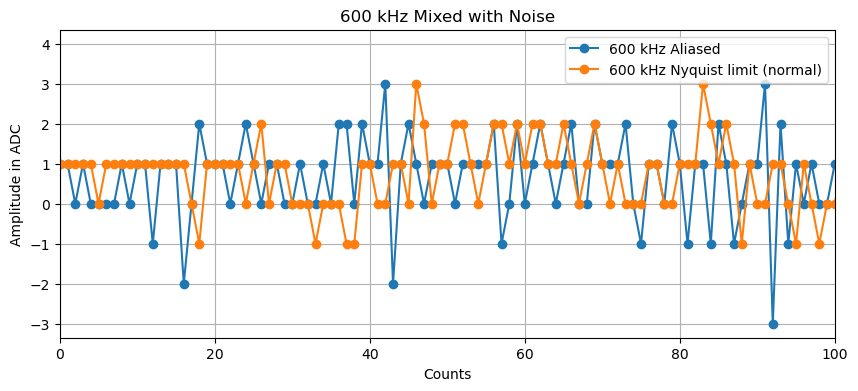

In [7]:
# With Noise (noise generator at level 5)
# Signal frequency = 600 kHz
# Amplitude = 100 mV_pp

# Below Nyquist limit (aliasing) = 1.4e6
Nbelow_lim_600khz = ziptoplot.unzip.unzip("Nbelow_lim_600khz.npz", 5)




# At Nyquist limit = 1.6e6
Nny_lim_600khz = ziptoplot.unzip.unzip("Nny_lim_600khz.npz", 5)


# Plotting all three together
plt.figure(figsize=(10,4))
plt.plot(Nbelow_lim_600khz, marker="o", label='600 kHz Aliased') #blue, aliased
plt.plot(Nny_lim_600khz, marker="o", label='600 kHz Nyquist limit (normal)') #orange, at limit

# Labeling
plt.title('600 kHz Mixed with Noise')
plt.xlabel('Counts')
plt.ylabel('Amplitude in ADC')
plt.legend()
plt.grid(True)
plt.xlim(0,100)
plt.show()

In [40]:
# Prove that the noise we used is true noise. Fit to a Gaussian curve. 

# testing gaussian fit


import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Noisy data collected, mixed with 600 kHz
noise = (
    Ndata_ny_lim_600khz[0] +
    Ndata_ny_lim_600khz[1] +
    Ndata_ny_lim_600khz[2] +
    Ndata_ny_lim_600khz[3] +
    Ndata_ny_lim_600khz[4] +
    Ndata_ny_lim_600khz[5] +
    Ndata_ny_lim_600khz[6] +
    Ndata_ny_lim_600khz[7] +
    Ndata_ny_lim_600khz[8] +
    Ndata_ny_lim_600khz[9]
)

# Remove DC offset
noise = noise - np.mean(noise)

# RMS voltage
Vrms = np.sqrt(np.mean(noise**2))

print(f"RMS voltage = {Vrms:.3f}")

# Gaussian using RMS as sigma
mu = 0.0
sigma = Vrms

gaussian_pdf = norm.pdf(bin_centers, mu, sigma)
values, counts = np.unique(noise, return_counts=True)
pmf = counts / counts.sum()


# Plotting
plt.figure(figsize=(8, 5))
# plt.bar(bin_centers, hist, width=bin_edges[1]-bin_edges[0],
#         color='mediumorchid', alpha=0.6, label="Noise histogram (PDF)")
plt.plot(bin_centers, gaussian_pdf, 'black', linewidth=3,
         label=r'Gaussian fit ($\sigma = V_\mathrm{RMS}$)')
plt.bar(values, pmf, width=1, alpha=0.6, color='mediumorchid', label="Noise PMF")
plt.xlabel("Voltage")
plt.ylabel("Probability Density")
plt.title("Noise Distribution vs Gaussian")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'Ndata_ny_lim_600khz' is not defined

In [76]:
# Radiometer equation: https://casper.astro.berkeley.edu/astrobaki/index.php/Radiometer_Equation

# For analyzing the noise, use numpy.histogram to plot the data 
# Overplot a theoretical Guassian with width equal to the rms voltage 

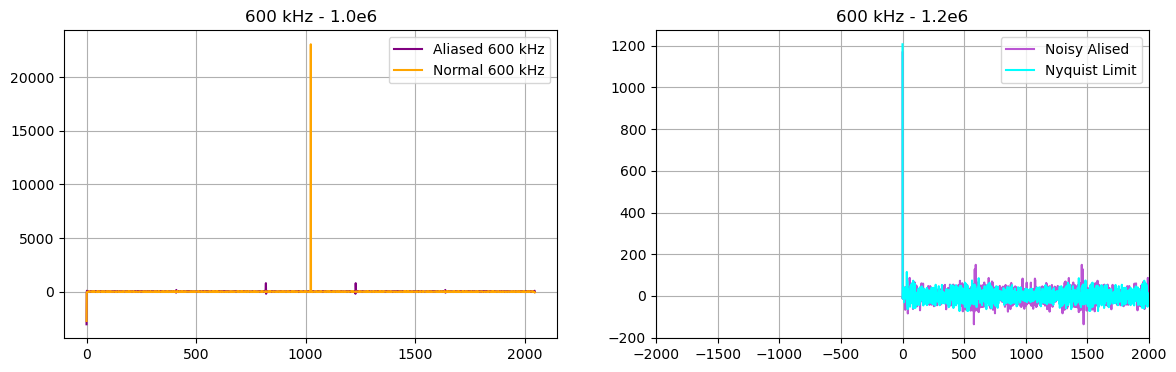

In [39]:
# Plot spectral leakage & frequency resolution 

Nbelowlim_600 = ziptoplot.unzip.unzip('Nbelow_lim_600khz.npz', 5)

Natlim_600 = ziptoplot.unzip.unzip('Nny_lim_600khz.npz', 5)


# Fourier Transforms
ft_belowlim_600 = np.fft.fft(belowlim_600)
ft_atlim_600 = np.fft.fft(atlim_600)

ft_Nbelowlim_600 = np.fft.fft(Nbelowlim_600)
ft_Natlim_600 = np.fft.fft(Natlim_600)

# Plotting 
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(14, 4))

# Clean, 600 kHz normal
axes[0].plot(ft_belowlim_600, label='Aliased 600 kHz', color='purple')
axes[0].plot(ft_atlim_600, label='Normal 600 kHz', color='orange') # 600 kHz Aliased 
axes[0].set_title("600 kHz - 1.0e6")
# axes[0].set_xlim(900, 1200)
axes[0].grid(True)
axes[0].legend()

# 600 kHz Noisy
axes[1].plot(ft_Nbelowlim_600, label='Noisy Alised', color='mediumorchid') # aliased 
axes[1].plot(ft_Natlim_600, label='Nyquist Limit', color='cyan') 
axes[1].set_title("600 kHz - 1.2e6")
axes[1].set_xlim(-2000, 2000)
axes[1].grid(True)
axes[1].legend()

# plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Subplot grid to compare frequencess and sampling rates.
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(10, 6))

# row 1: 600 kHz plots
axes[0, 0].plot(belowlim_600, color='thistle')
axes[0, 0].set_title("600 kHz - 1.0e6")
axes[0, 0].set_xlim(0, 25)
axes[0, 0].grid(True)

axes[0, 1].plot(atlim_600, color='mediumorchid')
axes[0, 1].set_title("600 kHz - 1.2e6")
axes[0, 1].set_xlim(0, 25)
axes[0, 1].grid(True)

axes[0, 2].plot(abovelim_600, color='darkorchid')
axes[0, 2].set_title("600 kHz - 1.2e6")
axes[0, 2].set_xlim(0, 25)
axes[0, 2].grid(True)

# row 2: 700 kHz plots
axes[1, 0].plot(abovelim_700, color='lightskyblue')
axes[1, 0].set_title("700 kHz - 1.2e6")
axes[1, 0].set_xlim(0, 25)
axes[1, 0].grid(True)

axes[1, 1].plot(abovelim_700, color='steelblue')
axes[1, 1].set_title("700 kHz - 1.4e6")
axes[1, 1].set_xlim(0, 25)
axes[1, 1].grid(True)
